In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import layers
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
#Busco todos los archivos .csv en la carpeta seleccionada
path_to_data = './'
csv_files = [pos_csv for pos_csv in os.listdir(path_to_data) if pos_csv.endswith('.csv')]

In [5]:
#veo todos los archivos
csv_files

['20131025000.csv',
 '20131050000.csv',
 '20131075000.csv',
 '20131100000.csv',
 '20131125000.csv',
 '20131150000.csv',
 '20131175000.csv',
 '20131200000.csv',
 '20131225000.csv',
 '2013125000.csv',
 '20131250000.csv',
 '20131275000.csv',
 '20131300000.csv',
 '20131325000.csv',
 '20131350000.csv',
 '20131375000.csv',
 '20131400000.csv',
 '20131425000.csv',
 '20131450000.csv',
 '20131475000.csv',
 '2013150000.csv',
 '20131500000.csv',
 '2013175000.csv',
 '20131e+05.csv',
 '20131e+06.csv',
 '2013225000.csv',
 '201325000.csv',
 '2013250000.csv',
 '2013275000.csv',
 '20132e+05.csv',
 '2013325000.csv',
 '2013350000.csv',
 '2013375000.csv',
 '20133e+05.csv',
 '2013425000.csv',
 '2013450000.csv',
 '2013475000.csv',
 '20134e+05.csv',
 '201350000.csv',
 '2013525000.csv',
 '2013550000.csv',
 '2013575000.csv',
 '20135e+05.csv',
 '2013625000.csv',
 '2013650000.csv',
 '2013675000.csv',
 '20136e+05.csv',
 '2013725000.csv',
 '201375000.csv',
 '2013750000.csv',
 '2013775000.csv',
 '20137e+05.csv',
 '2

In [8]:
# selecciono solamente tres para rapidez
csv_files= csv_files[0:3]

In [9]:
#lugar donde está la carpeta
data=[]
for file in csv_files:
    tmp=pd.read_csv(file, engine='python')
    data.append(tmp)
data=pd.concat(data)

In [11]:
#le pongo nombres a las columnas
new_col=['dec0_t1', 'dec1_t1', 'dec2_t1', 'dec3_t1', 'dec4_t1', 'dec5_t1','dec6_t1', 'dec7_t1', 'dec8_t1', 'dec9_t1','dir0_t1', 'dir1_t1', 'dir2_t1', 'dir3_t1', 'dir4_t1', 'dir5_t1','dir6_t1', 'dir7_t1', 'dir8_t1', 'dir9_t1','dec0_t2','dec1_t2','dec2_t2', 'dec3_t2', 'dec4_t2', 'dec5_t2', 'dec6_t2', 'dec7_t2','dec8_t2', 'dec9_t2','dir0_t2', 'dir1_t2','dir2_t2', 'dir3_t2', 'dir4_t2', 'dir5_t2', 'dir6_t2', 'dir7_t2','dir8_t2', 'dir9_t2','dec0_t3', 'dec1_t3', 'dec2_t3', 'dec3_t3','dec4_t3', 'dec5_t3', 'dec6_t3', 'dec7_t3', 'dec8_t3', 'dec9_t3','dir0_t3', 'dir1_t3', 'dir2_t3', 'dir3_t3','dir4_t3', 'dir5_t3', 'dir6_t3', 'dir7_t3', 'dir8_t3', 'dir9_t3','prono']

In [12]:
data=data[new_col]

In [ ]:
##
mn_scaler = preprocessing.MinMaxScaler()
d1_fitted=mn_scaler.fit(data.iloc[:,0:30])
d1=mn_scaler.transform(data.iloc[:,0:30])
d2=data.iloc[:,60]

In [ ]:
#g=mn_scaler.fit(data.iloc[:,0:30]).get_params()

In [ ]:
#data=np.hstack((np.array(d1),np.array(d2).reshape((d2.shape[0],1))))

In [13]:
prueb = np.array(data.iloc[:,np.r_[0:30,60]])  #.reshape((len(data),3,11))

In [14]:
feat = np.array(prueb)[:,:30]

In [15]:
scaler = preprocessing.MinMaxScaler()
feat2=scaler.fit_transform(feat)

In [16]:
features = feat.reshape((len(prueb),3,10))

In [17]:
resul = np.array(prueb)[:,30]

In [21]:
resul

array([1., 1., 3., ..., 3., 0., 3.])

In [22]:
tserie=3

In [23]:
#x, y = separar_secuencia(prueb,tserie)

In [33]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, resul, test_size=0.2)

In [25]:
y_train2= tf.keras.utils.to_categorical(y_train2,num_classes=4)
y_test2 = tf.keras.utils.to_categorical(y_test2,num_classes=4)

In [34]:
feat_num=len(X_train2[0][0])

In [27]:
model2 = tf.keras.models.load_model('lstm.h5')

In [35]:
predictions = model2.predict_classes(X_test2)

In [36]:
predictions

array([3, 3, 3, ..., 3, 3, 3])

In [31]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [37]:
cm = confusion_matrix(y_true=y_test2, y_pred=predictions)

In [39]:
cm2 = np.round(cm*100 / cm.astype(np.float).sum(axis=1, keepdims=True))

In [40]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Matriz de Confusion',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [41]:
cm_plot_labels = ['Rojo','Amarillo','Verde','Sin Riesgo']

Confusion matrix, without normalization
[[10.  0.  0. 90.]
 [12.  0.  0. 88.]
 [10.  0.  0. 90.]
 [ 7.  0.  0. 93.]]


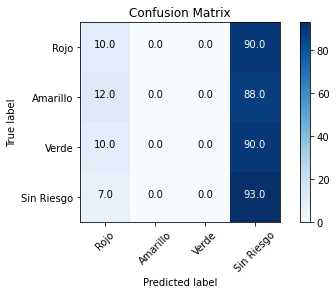

In [42]:
plot_confusion_matrix(cm=cm2, classes=cm_plot_labels, title='Confusion Matrix')